In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

import time
import os

pd.set_option('display.max_columns', 100)

In [2]:
path = r"C:\Users\jakea\Jupyter Files\RAC\Lime.ai\ThermalRunAway"
os.chdir(path)
files = os.listdir(); files

['869137061461083_2022-06-14_2023-07-10.csv',
 '869137061475315_2022-06-14_2023-07-10.csv',
 '869137061550653_2022-06-14_2023-07-10.csv',
 '869137062671573_2022-06-14_2023-07-10.csv',
 '869137062707104_2022-06-14_2023-07-10.csv',
 '869137064973001_2022-06-14_2023-07-10.csv',
 '869137064989866_2022-06-14_2023-07-10.csv',
 '869137064991193_2022-06-14_2023-07-10.csv',
 '869137065084618_2022-06-14_2023-07-10.csv',
 '869630050749047_2022-06-14_2023-07-10.csv',
 '869630053935767_2022-06-14_2023-07-10.csv',
 '869630054307917_2022-06-14_2023-07-10.csv',
 '869630054353333_2022-06-14_2023-07-10.csv',
 '869630054356336_2022-06-14_2023-07-10.csv',
 '869630057619938_2022-06-14_2023-07-10.csv',
 '869630057622718_2022-06-14_2023-07-10.csv',
 '869630057624466_2022-06-14_2023-07-10.csv',
 '869630058707161_2022-06-14_2023-07-10.csv',
 '869630058733936_2022-06-14_2023-07-10.csv',
 '869630059358089_2022-06-14_2023-07-10.csv',
 '869630059399497_2022-06-14_2023-07-10.csv',
 '869630059399885_2022-06-14_2023-

In [40]:
df = pd.read_csv(path+"\\"+files[1]); df.head()

C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\4290415053.py:1: DtypeWarning: Columns (5,7,12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+"\\"+files[1]); df.head()


,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,dischargeOTP,dischargeUTP,envHighTempProtect,envLowTempProtect,powerHighTempProtect,powerLowTempProtect,DFETOnOffStatus,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev
0,869137061475315,A,2022-10-18,14:47:55,17.347929,N,78.515053,E,0,0,315,7,2022-10-18T09:17:55.000Z,0.0,0.0,0,-40,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,869137061475315,A,2022-10-18,14:47:25,17.347929,N,78.515053,E,0,0,261,7,2022-10-18T09:17:25.000Z,0.0,0.0,0,-40,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,869137061475315,A,2022-10-18,14:48:25,17.347929,N,78.515053,E,0,0,154,7,2022-10-18T09:18:25.000Z,0.0,0.0,0,-40,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,869137061475315,A,2022-10-18,14:48:55,17.347929,N,78.515053,E,0,0,87,7,2022-10-18T09:18:55.000Z,0.0,0.0,0,-40,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,869137061475315,A,2022-10-18,14:49:25,17.347929,N,78.515053,E,0,0,42,7,2022-10-18T09:19:25.000Z,0.0,0.0,0,-40,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [10]:
df[(df.deepDischargeProhibitCharging==1)&(df.batCellHighTempWarn==1)].iloc[[-1]]

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,dischargeOTP,dischargeUTP,envHighTempProtect,envLowTempProtect,powerHighTempProtect,powerLowTempProtect,DFETOnOffStatus,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev
17,869137061475315,A,2022-10-18,14:59:41,17.348108,N,78.514633,E,0,0,304,8,2022-10-18T09:29:41.000Z,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,NaN,NaN,NaN,NaN


In [71]:
df_new= df[df.lat!=0].drop_duplicates(subset=['lat'], keep='last')

In [108]:
df_new['lat_dis']=df_new['lat'].diff()*1000
df_new['long_dis']=df_new['long'].diff()*1000
df_new = df_new.iloc[2:]

df_new['lat_dis'] = np.square(df_new['lat_dis'])
df_new['long_dis'] = np.square(df_new['long_dis'])

df_new['dis'] = df_new['long_dis']+ df_new['lat_dis']
df_new['dis'] = np.sqrt(df_new['dis'])
df_new = df_new.iloc[1:]     

C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\2504021647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lat_dis'] = np.square(df_new['lat_dis'])
C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\2504021647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['long_dis'] = np.square(df_new['long_dis'])
C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\2504021647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [109]:
df_new = df_new.reset_index(drop=True); df_new

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,...,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev,lat_dis,long_dis,dis,cum_dis,cal_time,cal_date,date_dis,cum_date
0,869137061475315,A,2022-11-14,16:45:40,28.367039,N,76.913589,E,0,0,131,18,2022-11-14T11:15:40.000Z,51.0,0.0,35,32,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,32,31,31.00,36,12.9,36.0,0.0,0,2,336,3642,3643,3643,3643,3643,3644,3644,3643,3643,3644,3644,3644,3644,3644,0,0,0,0,NaN,NaN,NaN,NaN,0.000100,0.000900,0.031623,11134.753103,1005,704,0.0,0.0
1,869137061475315,A,2022-11-14,17:03:37,28.367006,N,76.913635,E,0,0,58,17,2022-11-14T11:33:37.000Z,51.0,0.0,35,31,0,14,10.83,6.92,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,31,31,30.75,36,12.9,36.0,0.0,0,2,336,3642,3642,3642,3643,3643,3643,3643,3644,3643,3644,3644,3644,3644,3644,0,11,0,0,NaN,NaN,NaN,NaN,0.001089,0.002116,0.056613,11134.809715,1023,704,0.0,0.0
2,869137061475315,A,2022-11-14,18:31:21,28.366999,N,76.913620,E,0,0,27,20,2022-11-14T13:01:21.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,31,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3641,3641,3642,3642,3642,3642,3642,3642,3642,3643,3643,3643,3643,3643,0,0,0,0,NaN,NaN,NaN,NaN,0.000049,0.000225,0.016553,11134.826268,1111,704,0.0,0.0
3,869137061475315,A,2022-11-14,19:12:28,28.366991,N,76.913605,E,0,0,155,19,2022-11-14T13:42:28.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3640,3640,3640,3641,3640,3641,3640,3642,3642,3641,3641,3642,3642,3642,0,0,0,0,NaN,NaN,NaN,NaN,0.000064,0.000225,0.017000,11134.843268,1152,704,0.0,0.0
4,869137061475315,A,2022-11-14,21:39:46,28.366987,N,76.913597,E,0,0,162,17,2022-11-14T16:09:46.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,28,28.75,36,12.9,36.0,0.0,0,2,336,3639,3639,3639,3640,3640,3640,3640,3640,3640,3640,3640,3640,3641,3640,0,0,0,0,NaN,NaN,NaN,NaN,0.000016,0.000064,0.008944,11134.852213,1299,704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,869137061475315,A,2023-01-06,09:45:39,28.624062,N,77.098663,E,33,1294,251,12,NaN,51.3,10.4,60,20,0,14,1248.33,1119.00,100,32,0,0,0,0,0,0,0,0,0,0,0,0,1,DisCharging,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,23,18,20,20,18,19.00,36,21.7,36.0,14.5,42,73,144,3651,3668,3672,3669,3672,3668,3652,3645,3668,3673,3670,3674,3670,3655,0,1054,0,0,0.0,51C-V1.1,51.820,29.0,0.714025,5.560164,2.504833,

In [74]:
df_new['cum_dis'] = df_new['dis'].cumsum()


In [75]:
slope = stats.linregress(df_new['cum_dis'], df_new['cummulativeCharge'] )
slope[0]

0.08143058386749633

In [76]:
slope = stats.linregress(df_new['cum_dis'], df_new['cummulativeDischarge'] )
slope[0]

0.07298658533062351

In [8]:
def time_man(time):
    time = [int(i) for i in time.split(":")]
    return int(time[0]*60 + time[1])

def day_man(day):
    day = [int(i) for i in day.split("-")]
    return int((day[0]-2021)*12*30 + day[1]*30 + day[2])

In [110]:
df_new['cal_time'] = df_new['time'].apply(lambda x: time_man(str(x)))
df_new['cal_date'] = df_new['date'].apply(lambda x: day_man(str(x)))

In [111]:
df_new.head()

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,...,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev,lat_dis,long_dis,dis,cum_dis,cal_time,cal_date,date_dis,cum_date
0,869137061475315,A,2022-11-14,16:45:40,28.367039,N,76.913589,E,0,0,131,18,2022-11-14T11:15:40.000Z,51.0,0.0,35,32,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,32,31,31.00,36,12.9,36.0,0.0,0,2,336,3642,3643,3643,3643,3643,3644,3644,3643,3643,3644,3644,3644,3644,3644,0,0,0,0,NaN,NaN,NaN,NaN,0.000100,0.000900,0.031623,11134.753103,1005,704,0.0,0.0
1,869137061475315,A,2022-11-14,17:03:37,28.367006,N,76.913635,E,0,0,58,17,2022-11-14T11:33:37.000Z,51.0,0.0,35,31,0,14,10.83,6.92,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,31,31,30.75,36,12.9,36.0,0.0,0,2,336,3642,3642,3642,3643,3643,3643,3643,3644,3643,3644,3644,3644,3644,3644,0,11,0,0,NaN,NaN,NaN,NaN,0.001089,0.002116,0.056613,11134.809715,1023,704,0.0,0.0
2,869137061475315,A,2022-11-14,18:31:21,28.366999,N,76.913620,E,0,0,27,20,2022-11-14T13:01:21.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,31,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3641,3641,3642,3642,3642,3642,3642,3642,3642,3643,3643,3643,3643,3643,0,0,0,0,NaN,NaN,NaN,NaN,0.000049,0.000225,0.016553,11134.826268,1111,704,0.0,0.0
3,869137061475315,A,2022-11-14,19:12:28,28.366991,N,76.913605,E,0,0,155,19,2022-11-14T13:42:28.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3640,3640,3640,3641,3640,3641,3640,3642,3642,3641,3641,3642,3642,3642,0,0,0,0,NaN,NaN,NaN,NaN,0.000064,0.000225,0.017000,11134.843268,1152,704,0.0,0.0
4,869137061475315,A,2022-11-14,21:39:46,28.366987,N,76.913597,E,0,0,162,17,2022-11-14T16:09:46.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,28,28.75,36,12.9,36.0,0.0,0,2,336,3639,3639,3639,3640,3640,3640,3640,3640,3640,3640,3640,3640,3641,3640,0,0,0,0,NaN,NaN,NaN,NaN,0.000016,0.000064,0.008944,11134.852213,1299,704,0.0,0.0


In [112]:
df_new['date_dis']=df_new['cal_date'].diff()

df_new['cum_date'] = df_new['date_dis'].cumsum()
df_new['cum_dis'] = df_new['dis'].cumsum()


In [113]:
df_new.head()

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,...,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev,lat_dis,long_dis,dis,cum_dis,cal_time,cal_date,date_dis,cum_date
0,869137061475315,A,2022-11-14,16:45:40,28.367039,N,76.913589,E,0,0,131,18,2022-11-14T11:15:40.000Z,51.0,0.0,35,32,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,32,31,31.00,36,12.9,36.0,0.0,0,2,336,3642,3643,3643,3643,3643,3644,3644,3643,3643,3644,3644,3644,3644,3644,0,0,0,0,NaN,NaN,NaN,NaN,0.000100,0.000900,0.031623,0.031623,1005,704,NaN,NaN
1,869137061475315,A,2022-11-14,17:03:37,28.367006,N,76.913635,E,0,0,58,17,2022-11-14T11:33:37.000Z,51.0,0.0,35,31,0,14,10.83,6.92,100,4,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,30,30,31,31,31,30.75,36,12.9,36.0,0.0,0,2,336,3642,3642,3642,3643,3643,3643,3643,3644,3643,3644,3644,3644,3644,3644,0,11,0,0,NaN,NaN,NaN,NaN,0.001089,0.002116,0.056613,0.088235,1023,704,0.0,0.0
2,869137061475315,A,2022-11-14,18:31:21,28.366999,N,76.913620,E,0,0,27,20,2022-11-14T13:01:21.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,31,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3641,3641,3642,3642,3642,3642,3642,3642,3642,3643,3643,3643,3643,3643,0,0,0,0,NaN,NaN,NaN,NaN,0.000049,0.000225,0.016553,0.104788,1111,704,0.0,0.0
3,869137061475315,A,2022-11-14,19:12:28,28.366991,N,76.913605,E,0,0,155,19,2022-11-14T13:42:28.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,29,29.00,36,12.9,36.0,0.0,0,2,336,3640,3640,3640,3641,3640,3641,3640,3642,3642,3641,3641,3642,3642,3642,0,0,0,0,NaN,NaN,NaN,NaN,0.000064,0.000225,0.017000,0.121788,1152,704,0.0,0.0
4,869137061475315,A,2022-11-14,21:39:46,28.366987,N,76.913597,E,0,0,162,17,2022-11-14T16:09:46.000Z,50.9,0.0,35,29,0,14,10.83,6.92,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,32,29,29,29,28,28.75,36,12.9,36.0,0.0,0,2,336,3639,3639,3639,3640,3640,3640,3640,3640,3640,3640,3640,3640,3641,3640,0,0,0,0,NaN,NaN,NaN,NaN,0.000016,0.000064,0.008944,0.130733,1299,704,0.0,0.0


In [3]:
df_new= df[df.lat!=0].drop_duplicates(subset=['lat','cummulativeCharge', 'cummulativeDischarge','date'], keep='last')

NameError: name 'df' is not defined

In [164]:
df_new.head()

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,...,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev,lat_dis,long_dis,cal_time,cal_date,date_dis,cum_date,dis,cum_dis
1350,869137061475315,A,2022-11-14,13:09:40,28.366999,N,76.913597,E,0,0,74,18,2022-11-14T07:39:40.000Z,0.0,0.0,0,-40,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1.214160e+08,2.563316e+06,789,704,26.0,26.0,11134.598113,11134.598113
1384,869137061475315,A,2022-11-14,13:17:30,28.367012,N,76.913605,E,0,0,342,17,2022-11-14T07:47:30.000Z,0.0,0.0,0,-40,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1.690000e-04,6.400000e-05,797,704,0.0,26.0,0.015264,11134.613378
2783,869137061475315,A,2022-11-14,14:05:00,28.367018,N,76.913589,E,0,0,249,17,2022-11-14T08:35:00.000Z,0.0,0.0,0,-40,0,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-40,-40,-40,-40,-40,-40.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3.600000e-05,2.560000e-04,845,704,0.0,26.0,0.017088,11134.630466
2799,869137061475315,A,2022-11-14,14:13:00,28.367018,N,76.913589,E,0,0,246,17,2022-11-14T08:43:00.000Z,50.4,0.0,25,26,0,14,0.0,0.03,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,26,26,26,26.0,36,9.0,36.0,0.0,0,0,267,3605,3606,3606,3607,3607,3606,3607,3607,3607,3607,3607,3608,3608,3608,0,0,0,0,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,853,704,0.0,26.0,0.000000,11134.630466
2811,869137061475315,A,2022-11-14,14:18:55,28.366989,N,76.913612,E,0,0,165,18,2022-11-14T08:48:55.000Z,50.5,0.0,25,26,0,14,0.0,0.03,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,26,26,26,26.0,36,9.0,36.0,0.0,0,0,267,3606,3606,3607,3607,3607,3607,3607,3607,3607,3607,3608,3608,3608,3608,0,0,0,0,NaN,NaN,NaN,NaN,8.410000e-04,5.290000e-04,858,704,0.0,26.0,0.037014,11134.667479


In [166]:
df_new['lat_dis']=df_new['lat'].diff()*1000
df_new['long_dis']=df_new['long'].diff()*1000

df_new['cal_time'] = df_new['time'].apply(lambda x: time_man(str(x)))
df_new['cal_date'] = df_new['date'].apply(lambda x: day_man(str(x)))

df_new['date_dis']=df_new['cal_date'].diff()

df_new['cum_date'] = df_new['date_dis'].cumsum()

df_new = df_new.iloc[1:]

df_new['lat_dis'] = np.square(df_new['lat_dis'])
df_new['long_dis'] = np.square(df_new['long_dis'])

df_new['dis'] = df_new['long_dis']+ df_new['lat_dis']
df_new['dis'] = np.sqrt(df_new['dis'])

df_new = df_new.iloc[2:]

df_new['cum_dis'] = df_new['dis'].cumsum()

C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\222708483.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lat_dis'] = np.square(df_new['lat_dis'])
C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\222708483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['long_dis'] = np.square(df_new['long_dis'])
C:\Users\jakea\AppData\Local\Temp\ipykernel_6076\222708483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [167]:

df_new.head()

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,deviceTimeStamp,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,...,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,immobCmdStatus,iotHwVer,packOCV,cellDev,lat_dis,long_dis,cal_time,cal_date,date_dis,cum_date,dis,cum_dis
2799,869137061475315,A,2022-11-14,14:13:00,28.367018,N,76.913589,E,0,0,246,17,2022-11-14T08:43:00.000Z,50.4,0.0,25,26,0,14,0.00,0.03,100,3,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,26,26,26,26.00,36,9.0,36.0,0.0,0,0,267,3605,3606,3606,3607,3607,3606,3607,3607,3607,3607,3607,3608,3608,3608,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,853,704,0.0,0.0,0.000000,0.000000
2811,869137061475315,A,2022-11-14,14:18:55,28.366989,N,76.913612,E,0,0,165,18,2022-11-14T08:48:55.000Z,50.5,0.0,25,26,0,14,0.00,0.03,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,26,26,26,26.00,36,9.0,36.0,0.0,0,0,267,3606,3606,3607,3607,3607,3607,3607,3607,3607,3607,3608,3608,3608,3608,0,0,0,0,NaN,NaN,NaN,NaN,0.000841,0.000529,858,704,0.0,0.0,0.037014,0.037014
2812,869137061475315,A,2022-11-14,14:19:55,28.366989,N,76.913612,E,0,0,172,18,2022-11-14T08:49:55.000Z,51.6,19.4,25,26,1,14,0.10,0.03,100,48,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,27,26,26,26,26,26.00,36,9.2,36.0,0.0,0,0,267,3713,3685,3677,3682,3676,3685,3713,3724,3688,3677,3684,3677,3687,3714,1925,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,859,704,0.0,0.0,0.000000,0.037014
2813,869137061475315,A,2022-11-14,14:20:25,28.366989,N,76.913612,E,0,0,198,18,2022-11-14T08:50:25.000Z,51.6,17.6,25,26,1,14,0.27,0.03,100,45,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,26,26,26,26.00,36,9.3,36.0,0.0,0,0,267,3712,3686,3680,3684,3678,3686,3713,3723,3689,3680,3686,3681,3689,3715,1752,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,860,704,0.0,0.0,0.000000,0.037014
2814,869137061475315,A,2022-11-14,14:20:55,28.366989,N,76.913612,E,0,0,226,17,2022-11-14T08:50:55.000Z,51.7,16.7,26,27,1,14,0.43,0.03,100,43,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,5,28,26,27,26,26,26.25,36,9.5,36.0,0.0,0,0,267,3712,3687,3681,3684,3680,3687,3713,3722,3690,3681,3687,3682,3690,3714,1686,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,860,704,0.0,0.0,0.000000,0.037014


In [123]:
slope = stats.linregress(df_new['cum_date'], df_new['cummulativeCharge'] )
slope[0]

32.56444497643977

In [124]:
slope

LinregressResult(slope=32.56444497643977, intercept=-473.99805816239996, rvalue=0.9901886615329265, pvalue=0.0, stderr=0.04735410593107602, intercept_stderr=1.8445764168167018)

In [165]:
df_t = pd.DataFrame({'a':[0,2,4,6,8,10,12,14], 'b':[0,1,2,3,4,5,6,7]})
slope = stats.linregress(df_t['a'], df_t['b'] )
slope[0]

0.5

In [4]:
def processor(df):
    df_new= df[df.lat!=0].drop_duplicates(subset=['lat','cummulativeCharge', 'cummulativeDischarge','date'], keep='last')
    
    df_new['lat_dis']=df_new['lat'].diff()*1000
    df_new['long_dis']=df_new['long'].diff()*1000

    df_new['cal_time'] = df_new['time'].apply(lambda x: time_man(str(x)))
    df_new['cal_date'] = df_new['date'].apply(lambda x: day_man(str(x)))

    df_new['date_dis']=df_new['cal_date'].diff()
    df_new['charge_dis']=df_new['cummulativeCharge'].diff()
    df_new['discharge_dis']=df_new['cummulativeDischarge'].diff()

    df_new['cum_date'] = df_new['date_dis'].cumsum()

    df_new = df_new.iloc[1:]

    df_new['lat_dis'] = np.square(df_new['lat_dis'])
    df_new['long_dis'] = np.square(df_new['long_dis'])

    df_new['dis'] = df_new['long_dis']+ df_new['lat_dis']
    df_new['dis'] = np.sqrt(df_new['dis'])

    df_new = df_new.iloc[2:]

    df_new['cum_dis'] = df_new['dis'].cumsum()
    
    
    return df_new

In [5]:
df_full = pd.read_csv(path+"\\"+files[0])
df_full = df_full[(df_full.deepDischargeProhibitCharging==1)&(df_full.batCellHighTempWarn==1)].iloc[[-1]]
for i in files[1:]:
    try:
        df_temp = pd.read_csv(path+"\\"+i)
        df_temp= df_temp.drop_duplicates(subset=['time'], keep='first')
        df_temp = df_temp[(df_temp.deepDischargeProhibitCharging==1)&(df_temp.batCellHighTempWarn==1)].iloc[[-1]]
        df_full = pd.concat([df_full, df_temp], ignore_index=True)
    except:
        continue
    
df_full

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\2199811307.py:5: DtypeWarning: Columns (5,7,12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\2199811307.py:5: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\2199811307.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\2199811307.py:5: DtypeWarning: Columns (5,7,12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\2199811307.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=Fals

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,dischargeOTP,dischargeUTP,envHighTempProtect,envLowTempProtect,powerHighTempProtect,powerLowTempProtect,DFETOnOffStatus,CFETOnOffStatus,dischargeOnOffStatus,chargeOnOffStatus,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,deviceTimeStamp,immobCmdStatus,iotHwVer,packOCV,cellDev
0,869137061461083,V,2022-08-23,15:47:28,0.000000,0,0.000000,0,0,0,0,0,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,NaN,NaN,NaN,NaN,NaN
1,869137061475315,A,2022-10-18,14:59:41,17.348108,N,78.514633,E,0,0,304,8,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,2022-10-18T09:29:41.000Z,NaN,NaN,NaN,NaN
2,869137062671573,V,2022-10-19,16:18:12,0.000000,0,0.000000,0,0,0,0,0,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,2022-10-19T10:48:12.000Z,NaN,NaN,NaN,NaN
3,869137062707104,V,2022-10-21,11:06:27,0.000000,0,0.000000,0,0,0,0,0,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,2022-10-21T05:36:27.000Z,NaN,NaN,NaN,NaN
4,869137064973001,A,2022-12-01,11:10:55,17.347960,N,78.514931,E,0,0,148,6,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,1,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,NaN,0.0,51C-V1.1,50.7,12.0
5,869137064991193,A,2023-01-19,11:45:43,17.347996,N,78.514961,E,0,0,89,6,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,1,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,NaN,0.0,51C-V1.1,50.7,12.0
6,869630050749047,V,2022-09-27,15:49:00,0.000000,0,0.000000,0,0,0,0,0,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,5,53,54,51,52,54,52.75,36.0,9.8,32.3,32.3,3,11,379,3624,3621,3624,3624,3624,3624,3630,3631,3626,3626,3627,3628,3627,3633,256,3904,0,0,NaN,NaN,NaN,NaN,NaN
7,869630057619938,A,2022-06-27,20:08:56,17.348070,N,78.514915,E,0,0,323,8,50.7,0.0,30,54,0,14,125.21,128.65,14,10254,0,1,1,0,1,1,1,1,0,1,0,0,0,DisCharging,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0

In [6]:
max_charge, max_discharge = df_full.cummulativeCharge.mean(), df_full.cummulativeDischarge.mean(); max_charge, max_discharge

(125.21000000000001, 128.65000000000003)

In [9]:
df_ex = pd.read_csv(path+"\\"+files[0])
df_ex = processor(df_ex)
for i in files[1:]:
    try:
        df_temp = pd.read_csv(path+"\\"+i)
        df_temp= processor(df_temp.drop_duplicates(subset=['time', 'date'], keep='first'))
        df_ex = pd.concat([df_ex, df_temp], ignore_index=True)
    except:
        continue
    
df_ex

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\667392885.py:5: DtypeWarning: Columns (5,7,12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\667392885.py:5: DtypeWarning: Columns (98) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\667392885.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\667392885.py:5: DtypeWarning: Columns (5,7,12,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path+"\\"+i)
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\667392885.py:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,...,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,lat_dis,long_dis,cal_time,cal_date,date_dis,charge_dis,discharge_dis,cum_date,dis,cum_dis,deviceTimeStamp,immobCmdStatus,iotHwVer,packOCV,cellDev
0,869137061475315,A,2022-11-14,14:29:55,28.366989,N,76.913612,E,0,0,62,17,51.7,11.9,31,28,1,14,2.51,0.03,100,33,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,27,27,27.25,36.0,11.5,36.0,0.0,0,1,267,3710,3691,3687,3689,3687,3691,3711,3719,3692,3688,3691,3688,3693,3713,1192,0,0,0,0.000000,0.000000,869,704,0.0,1.07,0.0,26.0,0.000000,0.000000,2022-11-14T08:59:55.000Z,NaN,NaN,NaN,NaN
1,869137061475315,A,2022-11-14,14:30:25,28.366989,N,76.913612,E,0,0,80,17,51.7,11.7,32,28,1,14,2.61,0.03,100,31,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,28,27,27.50,36.0,11.7,36.0,0.0,0,1,267,3709,3691,3688,3690,3687,3691,3711,3718,3692,3688,3691,3689,3693,3713,1180,0,0,0,0.000000,0.000000,870,704,0.0,0.10,0.0,26.0,0.000000,0.000000,2022-11-14T09:00:25.000Z,NaN,NaN,NaN,NaN
2,869137061475315,A,2022-11-14,14:30:55,28.366989,N,76.913612,E,0,0,96,17,51.7,11.5,32,28,1,14,2.72,0.03,100,33,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,28,27,27.50,36.0,11.8,36.0,0.0,0,1,267,3710,3691,3688,3690,3687,3692,3711,3718,3693,3688,3691,3689,3693,3712,1150,0,0,0,0.000000,0.000000,870,704,0.0,0.11,0.0,26.0,0.000000,0.000000,2022-11-14T09:00:55.000Z,NaN,NaN,NaN,NaN
3,869137061475315,A,2022-11-14,14:33:55,28.366989,N,76.913612,E,0,0,213,17,51.7,10.4,34,28,1,14,3.29,0.03,100,29,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,28,28,28,28,28.00,36.0,12.3,36.0,0.0,0,1,267,3710,3692,3689,3691,3689,3692,3711,3718,3694,3690,3692,3690,3693,3713,1043,0,0,0,0.000000,0.000000,873,704,0.0,0.57,0.0,26.0,0.000000,0.000000,2022-11-14T09:03:55.000Z,NaN,NaN,NaN,NaN
4,869137061475315,A,2022-11-14,14:34:55,28.366989,N,76.913612,E,0,0,189,17,51.7,10.1,34,28,1,14,3.45,0.03,100,29,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,26,28,28,28,28,28.00,36.0,12.5,36.0,0.0,0,1,267,3710,3692,3690,3691,3689,3692,3711,3718,3693,3690,3692,3690,3694,3712,1007,0,0,0,0.000000,0.000000,874,704,0.0,0.16,0.0,26.0,0.000000,0.000000,2022-11-14T09:04:55.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720938,869630059399885,A,2022-09-05,22:41:47,26.952353,N,75.796425,E,0,609,42,12,0.0,0.0,0,-40,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-40,-40,-40,-40,-40,-40.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000169,0.000049,1361,635,0.0,0.00,0.0,19.0,0.014765,8360.647609,NaN,NaN,NaN,NaN,NaN
17209

In [10]:
df_ex



,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,...,DFETFail,CFETFail,immobilizeStatus,numOfTempSens,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,lat_dis,long_dis,cal_time,cal_date,date_dis,charge_dis,discharge_dis,cum_date,dis,cum_dis,deviceTimeStamp,immobCmdStatus,iotHwVer,packOCV,cellDev
0,869137061475315,A,2022-11-14,14:29:55,28.366989,N,76.913612,E,0,0,62,17,51.7,11.9,31,28,1,14,2.51,0.03,100,33,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,27,27,27.25,36.0,11.5,36.0,0.0,0,1,267,3710,3691,3687,3689,3687,3691,3711,3719,3692,3688,3691,3688,3693,3713,1192,0,0,0,0.000000,0.000000,869,704,0.0,1.07,0.0,26.0,0.000000,0.000000,2022-11-14T08:59:55.000Z,NaN,NaN,NaN,NaN
1,869137061475315,A,2022-11-14,14:30:25,28.366989,N,76.913612,E,0,0,80,17,51.7,11.7,32,28,1,14,2.61,0.03,100,31,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,28,27,27.50,36.0,11.7,36.0,0.0,0,1,267,3709,3691,3688,3690,3687,3691,3711,3718,3692,3688,3691,3689,3693,3713,1180,0,0,0,0.000000,0.000000,870,704,0.0,0.10,0.0,26.0,0.000000,0.000000,2022-11-14T09:00:25.000Z,NaN,NaN,NaN,NaN
2,869137061475315,A,2022-11-14,14:30:55,28.366989,N,76.913612,E,0,0,96,17,51.7,11.5,32,28,1,14,2.72,0.03,100,33,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,27,28,28,27,27.50,36.0,11.8,36.0,0.0,0,1,267,3710,3691,3688,3690,3687,3692,3711,3718,3693,3688,3691,3689,3693,3712,1150,0,0,0,0.000000,0.000000,870,704,0.0,0.11,0.0,26.0,0.000000,0.000000,2022-11-14T09:00:55.000Z,NaN,NaN,NaN,NaN
3,869137061475315,A,2022-11-14,14:33:55,28.366989,N,76.913612,E,0,0,213,17,51.7,10.4,34,28,1,14,3.29,0.03,100,29,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,27,28,28,28,28,28.00,36.0,12.3,36.0,0.0,0,1,267,3710,3692,3689,3691,3689,3692,3711,3718,3694,3690,3692,3690,3693,3713,1043,0,0,0,0.000000,0.000000,873,704,0.0,0.57,0.0,26.0,0.000000,0.000000,2022-11-14T09:03:55.000Z,NaN,NaN,NaN,NaN
4,869137061475315,A,2022-11-14,14:34:55,28.366989,N,76.913612,E,0,0,189,17,51.7,10.1,34,28,1,14,3.45,0.03,100,29,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,26,28,28,28,28,28.00,36.0,12.5,36.0,0.0,0,1,267,3710,3692,3690,3691,3689,3692,3711,3718,3693,3690,3692,3690,3694,3712,1007,0,0,0,0.000000,0.000000,874,704,0.0,0.16,0.0,26.0,0.000000,0.000000,2022-11-14T09:04:55.000Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720938,869630059399885,A,2022-09-05,22:41:47,26.952353,N,75.796425,E,0,609,42,12,0.0,0.0,0,-40,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-40,-40,-40,-40,-40,-40.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000169,0.000049,1361,635,0.0,0.00,0.0,19.0,0.014765,8360.647609,NaN,NaN,NaN,NaN,NaN
17209

In [11]:
df_ex = df_ex[(df_ex.charge_dis>0)&(df_ex.discharge_dis>0)]

df_ex['dis_vs_charge'] = df_ex['dis'] / df_ex['charge_dis']
df_ex['dis_vs_discharge'] = df_ex['dis'] / df_ex['discharge_dis']

df_ex['date_vs_charge'] = df_ex['date_dis'] / df_ex['charge_dis']
df_ex['date_vs_discharge'] = df_ex['date_dis'] / df_ex['discharge_dis']


C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\902748318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['dis_vs_charge'] = df_ex['dis'] / df_ex['charge_dis']
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\902748318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['dis_vs_discharge'] = df_ex['dis'] / df_ex['discharge_dis']
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\902748318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [12]:
df_ex

,imei,gpsValidity,date,time,lat,latDirection,long,longDirection,speed,odo,gpsDirection,noOfSats,batVolt,batCurrent,socPercent,batMaxTemp,batStatus,NoOfBatCells,cummulativeCharge,cummulativeDischarge,sohPercent,CVDev,cellUnbalanceProtection,voltSensingWireBroken,deepDischargeProhibitCharging,cellOVP,cellUVP,packOVP,packUVP,cellOVW,cellUVW,packOVW,packUVW,chargeStatus,dischargeStatus,bmsStatus,chargeOCP,SCProtection,dischargeOCP1,dischargeOCP2,chargeOCW,dischargeOCW,batCellHighTempWarn,batCellLowTempWarn,envHighTempWarn,envLowTempWarn,powerHighTempWarn,powerLowTempWarn,chargeOTP,chargeUTP,...,MOSFETTemp,batTemp1,batTemp2,batTemp3,batTemp4,batTemp,designCapacity,availableCapacity,fullChargeCapacity,learningCapacity,dischargeCycle,chargeCycle,usedCapacity,cell1Volt,cell2Volt,cell3Volt,cell4Volt,cell5Volt,cell6Volt,cell7Volt,cell8Volt,cell9Volt,cell10Volt,cell11Volt,cell12Volt,cell13Volt,cell14Volt,cell15Volt,cell16Volt,CFET,DFET,lat_dis,long_dis,cal_time,cal_date,date_dis,charge_dis,discharge_dis,cum_date,dis,cum_dis,deviceTimeStamp,immobCmdStatus,iotHwVer,packOCV,cellDev,dis_vs_charge,dis_vs_discharge,date_vs_charge,date_vs_discharge
7,869137061475315,A,2022-11-14,14:42:55,28.366989,N,76.913612,E,0,0,122,18,48.3,40.4,30,29,0,14,4.16,2.28,100,91,0,0,0,0,0,0,0,0,1,0,1,0,0,DisCharging,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,31,29,29,29,29,29.00,36.0,10.9,36.0,0.0,0,1,289,3408,3460,3476,3467,3478,3462,3409,3388,3459,3479,3466,3479,3461,3409,0,4047,0,0,0.000000,0.000000,882,704,0.0,0.53,2.25,26.0,0.000000,0.000000,2022-11-14T09:12:55.000Z,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0
12,869137061475315,A,2022-11-14,14:49:55,28.366989,N,76.913612,E,0,0,120,17,50.7,20.0,17,32,1,14,4.18,6.92,100,41,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,34,31,32,32,31,31.50,36.0,6.3,36.0,0.0,0,1,336,3639,3620,3612,3616,3611,3622,3640,3652,3623,3613,3617,3613,3623,3641,2014,0,0,0,0.000000,0.000000,889,704,0.0,0.02,1.19,26.0,0.000000,0.000000,2022-11-14T09:19:55.000Z,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0
53,869137061475315,A,2022-11-14,14:40:25,28.366989,N,76.913612,E,0,0,93,18,48.6,40.3,35,28,0,14,4.16,0.56,100,92,0,0,0,0,0,0,0,0,0,0,1,0,0,DisCharging,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28.00,36.0,12.6,36.0,0.0,0,1,272,3434,3486,3501,3493,3504,3488,3436,3414,3485,3505,3493,3505,3486,3436,0,4029,0,0,0.000000,0.000000,880,704,0.0,0.08,0.53,26.0,0.000000,0.184181,2022-11-14T09:10:25.000Z,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0
69,869137061475315,A,2022-11-14,14:50:25,28.366989,N,76.913612,E,0,0,143,17,51.0,20.1,18,32,1,14,4.36,6.92,100,42,0,0,0,0,0,0,0,0,0,0,0,1,0,Charging,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,34,31,32,32,31,31.50,36.0,6.5,36.0,0.0,0,1,336,3663,3644,3635,3640,3635,3645,3666,3675,3645,3635,3640,3636,3646,3666,2014,0,0,0,0.000000,0.000000,890,704,0.0,0.20,0.57,26.0,0.000000,0.184181,2022-11-14T09:20:25.000Z,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0
114,869137061475315,A,2022-11-15,07:40:37,28.366955,N,76.913620,E,0,0,151,16,50.8,0.0,35,28,0,14,5.83,6.92,100,5,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32,27,28,27,27,27.25,36.0,12.6,36.0,0.0,0,2,231,3634,3635,3635,3634,3635,3635,3635,3635,3635,3636,3636,3636,3635,3636,0,0,0,0,0.000441,0.000064,460,705,0.0,5.83,6.92,27.0,0.022472,0.562650,2022-11-15T02:10:37.000Z,NaN,NaN,NaN,NaN,0.003855,0.003247,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713450,869630059399885,A,2022-08-25,23:05:48,26.929609,N,75.837570,E,9,24,63,5,51.7,0.0,55,35,0,14,5.98,0.91,100,6,0,0,0,0,0,0,0,0,0,0,0,0,0,Idle,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37,33,34,35,34,34.00,36.0,20.0,36.0,0.0,0,2,160,3694,3696,3696,3698,36

In [13]:
for i in df_ex.columns[-4:]:
    print(df_ex[i].mean())

96.04964237441745
30.33816465555483
0.10417750453400515
0.254178590738673


In [14]:
for i in df_ex.columns[-4:]:
    print(df_ex[i].median())

18.081945640127238
13.790776261274912
0.0
0.0


C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\1595331160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ex[i], hist=False)


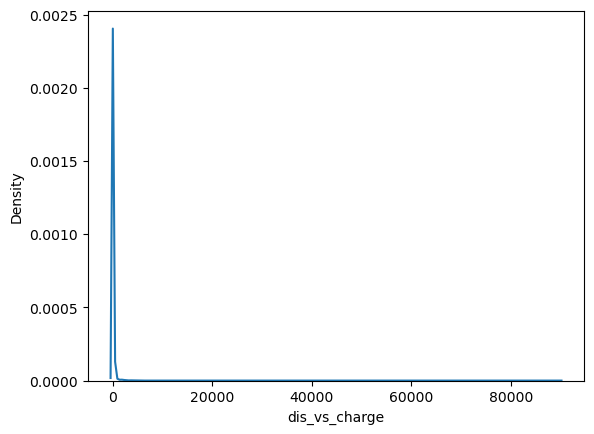

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\1595331160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ex[i], hist=False)


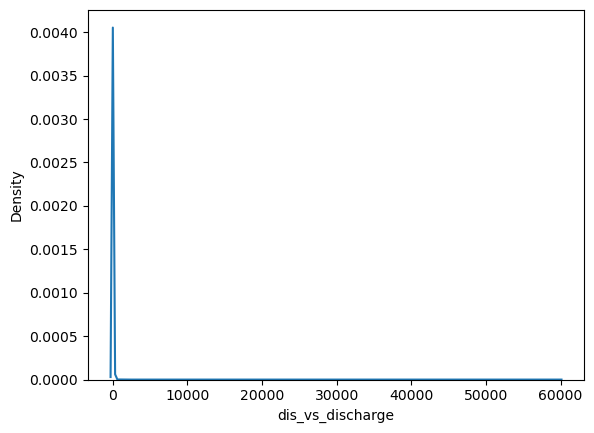

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\1595331160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ex[i], hist=False)


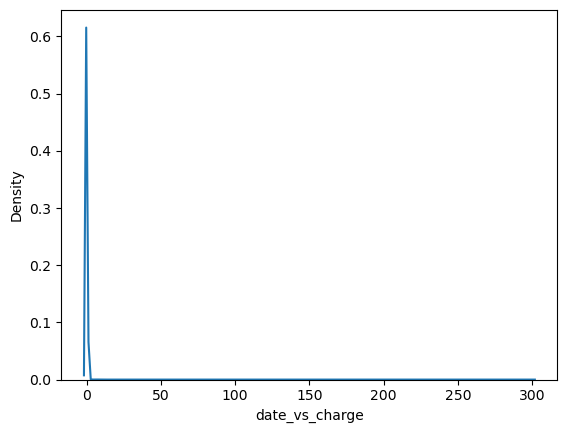

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\1595331160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_ex[i], hist=False)


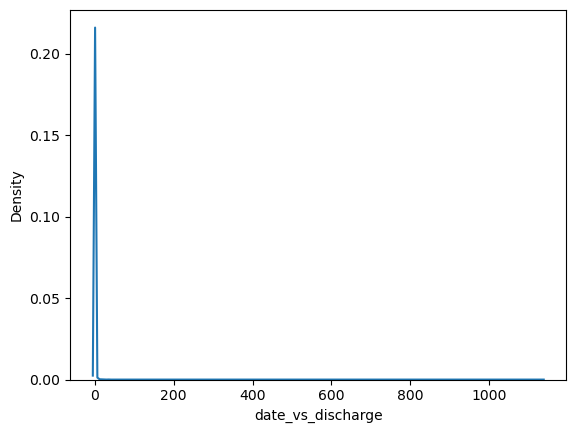

In [15]:
for i in df_ex.columns[-4:]:
    sns.distplot(df_ex[i], hist=False)
    plt.show()

In [16]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.5,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df_ex)

capping the  imei
capping the  gpsValidity
capping the  date
capping the  time
capping the  lat
capping the  latDirection
capping the  long
capping the  longDirection
capping the  speed
capping the  odo
capping the  gpsDirection
capping the  noOfSats
capping the  batVolt
capping the  batCurrent
capping the  socPercent
capping the  batMaxTemp
capping the  batStatus
capping the  NoOfBatCells
capping the  cummulativeCharge
capping the  cummulativeDischarge
capping the  sohPercent
capping the  CVDev
capping the  cellUnbalanceProtection
capping the  voltSensingWireBroken
capping the  deepDischargeProhibitCharging
capping the  cellOVP
capping the  cellUVP
capping the  packOVP
capping the  packUVP
capping the  cellOVW
capping the  cellUVW
capping the  packOVW
capping the  packUVW
capping the  chargeStatus
capping the  dischargeStatus
capping the  bmsStatus
capping the  chargeOCP
capping the  SCProtection
capping the  dischargeOCP1
capping the  dischargeOCP2
capping the  chargeOCW
capping the 

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

capping the  dischargeOTP
capping the  dischargeUTP
capping the  envHighTempProtect
capping the  envLowTempProtect
capping the  powerHighTempProtect
capping the  powerLowTempProtect
capping the  DFETOnOffStatus
capping the  CFETOnOffStatus
capping the  dischargeOnOffStatus
capping the  chargeOnOffStatus
capping the  DFETFail
capping the  CFETFail
capping the  immobilizeStatus
capping the  numOfTempSens
capping the  MOSFETTemp
capping the  batTemp1
capping the  batTemp2
capping the  batTemp3
capping the  batTemp4
capping the  batTemp
capping the  designCapacity
capping the  availableCapacity
capping the  fullChargeCapacity
capping the  learningCapacity
capping the  dischargeCycle
capping the  chargeCycle
capping the  usedCapacity
capping the  cell1Volt
capping the  cell2Volt
capping the  cell3Volt
capping the  cell4Volt
capping the  cell5Volt
capping the  cell6Volt
capping the  cell7Volt
capping the  cell8Volt
capping the  cell9Volt
capping the  cell10Volt
capping the  cell11Volt
cappin

C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\3156642353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [17]:
for i in final_df.columns[-4:]:
    print(final_df[i].mean())

64.76207541711528
24.94896113483319
0.0
0.0


In [18]:
for i in final_df.columns[-4:]:
    print(final_df[i].median())

18.089490740992566
13.79105743114394
0.0
0.0


In [2]:
def Timely(cum_):
    d_v_c = 17.81
    t_v_c = 2.6
    charge = 128.65 - cum_
    if charge >0:
        dis = charge * d_v_c
        days = charge * t_v_c
    elif charge <0:
        dis = days = -1
    else:
        dis = days = 0
    if dis<0:
        print("No battery worries!")
    elif dis==0:
        print("Be very vigilent!")
    else:
        print(f"Days for alert: {round(days)}days\n")
    

In [4]:
Timely(122)

Days for alert: 17days



In [24]:
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

import scipy.stats as sps


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\461964727.py:6: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(mtcars_subset)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jakea\AppData\Local\Temp\ipykernel_16464\461964727.py:6: Conver

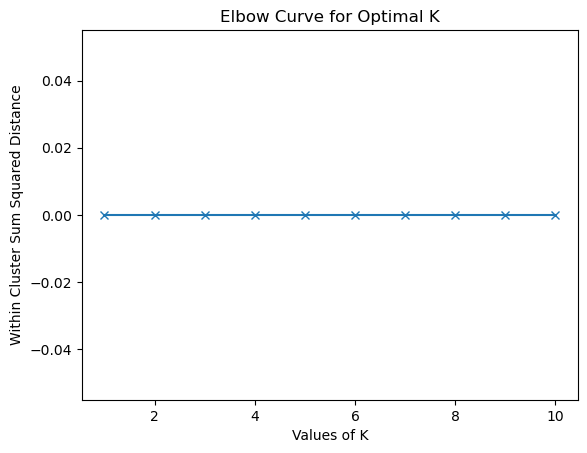

In [22]:
mtcars_subset = final_df[['date_vs_discharge']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(mtcars_subset)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [26]:
#Tests

sps.shapiro(df_ex['date_vs_discharge'])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=1.0, pvalue=1.0)

In [27]:
sps.anderson(df_ex['date_vs_discharge'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1948: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


AndersonResult(statistic=nan, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=0.0)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')

In [28]:
sps.kstest(df_ex['date_vs_discharge'],'norm',
           args=(df_ex['date_vs_discharge'].mean(),
                 df_ex['date_vs_discharge'].std()))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


KstestResult(statistic=nan, pvalue=nan, statistic_location=0.0, statistic_sign=-1)

In [29]:
df_ex['date_vs_discharge'].skew()

0

In [30]:
df_ex['date_vs_discharge'].kurtosis()

0